In [4]:
#HOME MADE FUNCTIONS BY CUPANI
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

def plot_2d(data, figsize=(8,8), xlabel='x pixel', ylabel='y pixel', vrange=200, ax=None):
    """ @brief Plot a 2-d array
        @param data 2-d array
        @param figsize Figure size
        @param xlabel X-axis label
        @param ylabel Y-axis label
        @param vrange Range of values around median
        @param ax Axes to overplot on
    """

    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if vrange is not None:
        import numpy as np
        vmed = np.median(data)
        vmin, vmax = vmed-vrange/2, vmed+vrange/2
        ax.imshow(data, vmin=vmin, vmax=vmax)
    else:
        ax.imshow(data)
    
    return ax   # ...so it can be used to overplot other stuff
    

def plot_1d(data_x, data_y, figsize=(12,8), xlabel='x pixel', ylabel='y pixel', kind='plot', color='C0', ax=None):
    """ @brief Plot two 1-d arrays one versus the other
        @param data_x 1-d array of x values
        @param data_y 1-d array of y values
        @param figsize Figure size
        @param xlabel X-axis label
        @param ylabel Y-axis label
        @param kind Kind of plot ('plot', 'scatter', 'step')
        @param color Color of plot
        @param ax Axes to overplot on
    """

    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    getattr(ax, kind)(data_x, data_y, color=color)  # getattr(ax, 'plot') -> plt.plot, etc.
    
    return ax


def plot_hist(data, bins, figsize=(12,8), xlabel='value', ylabel='frequency', color='C0', ax=None):
    """ @brief Plot a histogram
        @param data 1-d array of values
        @param bins range of bins
        @param figsize Figure size
        @param xlabel X-axis label
        @param ylabel Y-axis label
        @param ax Axes to overplot on
    """

    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.hist(data, bins, color=color)
    
    return ax

In [5]:
name = '/home/starcat/Scaricati/SZ_Lyn-0001_V.fit'
hdul = fits.open(name)
hdul

In [6]:
hdu = hdul[0]
hdu

In [7]:
hdu.header

SIMPLE  =                    T                                                  
BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     
NAXIS   =                    2 /number of axes                                  
NAXIS1  =                 2048 /fastest changing axis                           
NAXIS2  =                 2048 /next to fastest changing axis                   
BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           
BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           
DATE-OBS= '2022-03-21T19:40:54' /YYYY-MM-DDThh:mm:ss observation start, UT      
EXPTIME =   30.000000000000000 /Exposure time in seconds                        
EXPOSURE=   30.000000000000000 /Exposure time in seconds                        
SET-TEMP=  -25.000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP=  -20.713531494140625 /CCD temperature at start of exposure in C       
XPIXSZ  =   18.0000000000000

In [8]:
h =hdu.header
d = hdu.data
d.shape

(2048, 2048)

<function matplotlib.pyplot.show(close=None, block=None)>

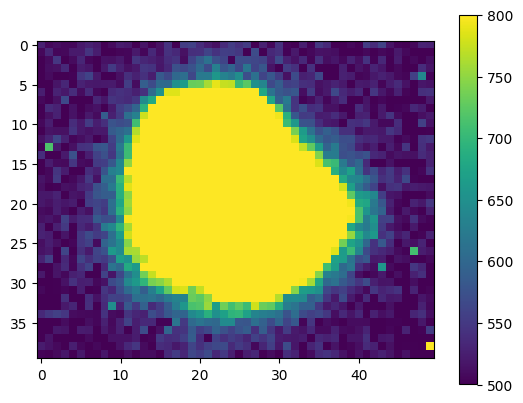

In [9]:
import matplotlib.pyplot as plt
import numpy as np
#fig, ax = plt.subplots(figsize=(14, 14))
#ax.imshow(d, vmin=500, vmax=1000)
plt.imshow(d[840:880, 590:640], vmin=500, vmax=800)
plt.colorbar()
plt.show

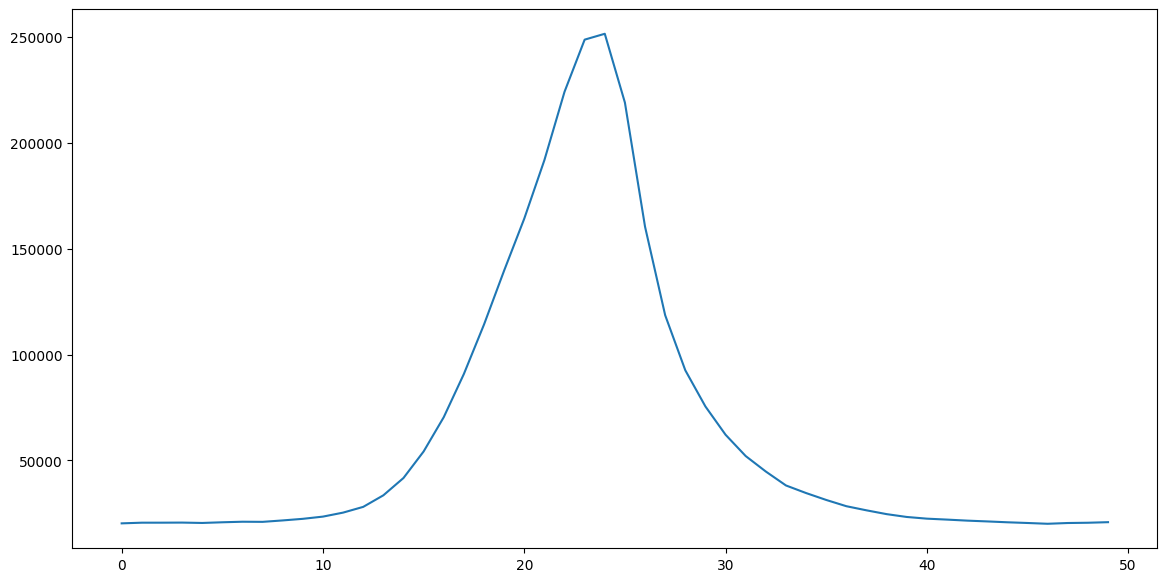

In [10]:
sdata = d[840:880, 590:640]
sum_col = np.sum(sdata, axis=0)
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(range(len(sum_col)), sum_col)


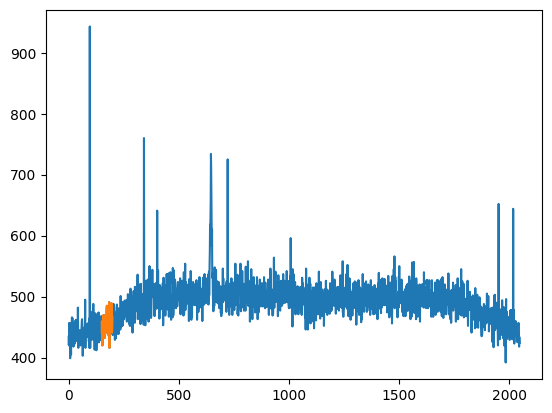

In [11]:
r = d[753]
x = range(len(r))

plt.plot(x, r)
plt.plot(x[150:200], r[150:200])


<function matplotlib.pyplot.show(close=None, block=None)>

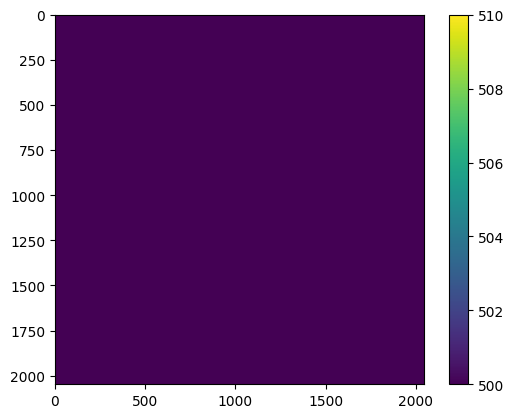

In [12]:
bias = fits.open('/home/starcat/Scaricati/Calib-Qpani/calib/bias-0001.fit')[0].data
datas = bias.data
plt.imshow(datas, vmin=500, vmax=510)
plt.colorbar()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

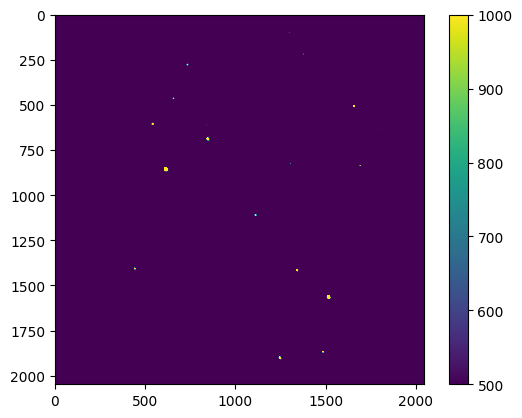

In [13]:
#come fare a cavare il bias?
bias_array = np.asarray([fits.open('/home/starcat/Scaricati/Calib-Qpani/calib/bias-{:04d}.fit'.format(i))[0].data for i in range(1, 10)])
master_bias = np.mean(bias_array, axis=0)
d_debiased = d-master_bias
plt.imshow(d_debiased, vmin=500, vmax=1000)
plt.colorbar()
#plt.imshow(master_bias, vmin=200, vmax=250)
plt.show

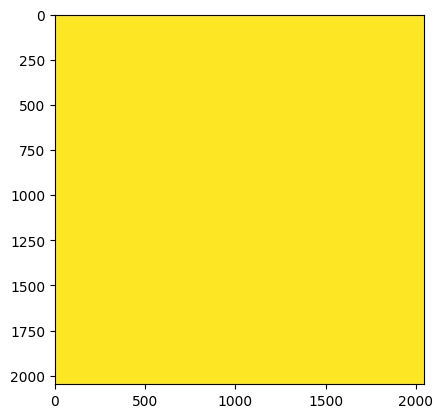

In [14]:
#aprire vari bias
bias_array = np.asarray([fits.open('/home/starcat/Scaricati/Calib-Qpani/calib/bias-{:04d}.fit'.format(i))[0].data for i in range(1, 10)])
master_bias = np.mean(bias_array, axis=0)
plt.imshow(master_bias, vmin=200, vmax=250)


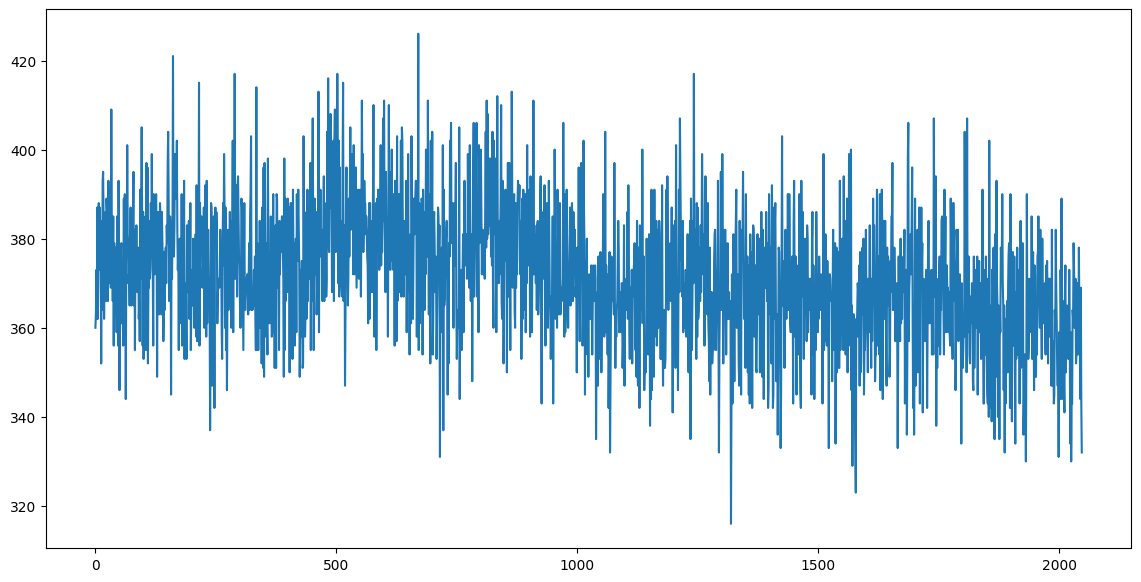

In [15]:
bias_r = bias[0]
fig, ax = plt.subplots(figsize=(14,7))
plt.plot(range(len(bias_r)), bias_r)

<Axes: xlabel='x pixel', ylabel='y pixel'>

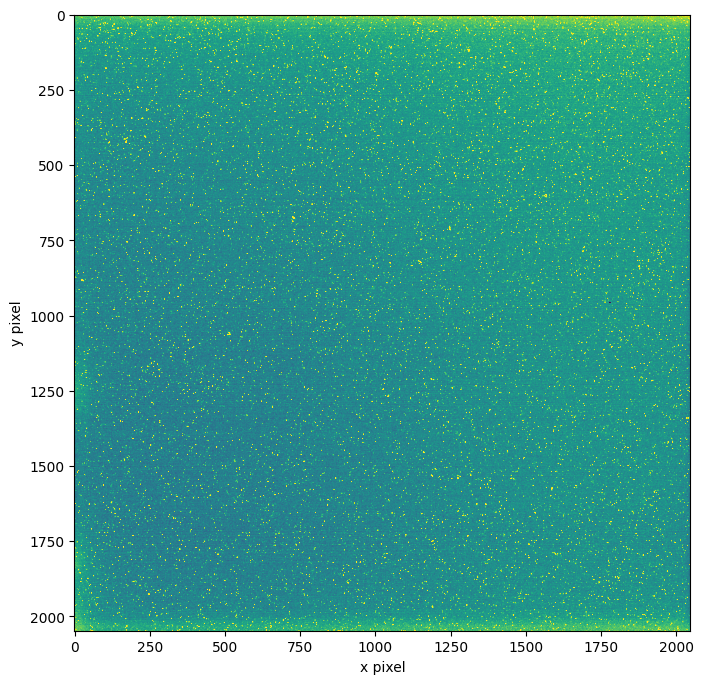

In [16]:
#rimozione della dark current
#h.exposure
dark_array = np.asarray([fits.open('/home/starcat/Scaricati/Calib-Qpani/calib/dark-{:04d}_30s.fit'.format(i))[0].data for i in range(1, 10)])

dark_debiased = [d-master_bias for d in dark_array]
mdark = np.mean(dark_debiased, axis = 0) #axis 0 perché abbiamo un array a 3 componenti una per le righe dell'immagine una per le colonne dell'immagine una per l'immagine, siccome vogliamo mediare sulle immagini mettiamo l'asse 0
plot_2d(mdark, vrange = 50)

<Axes: xlabel='x pixel', ylabel='y pixel'>

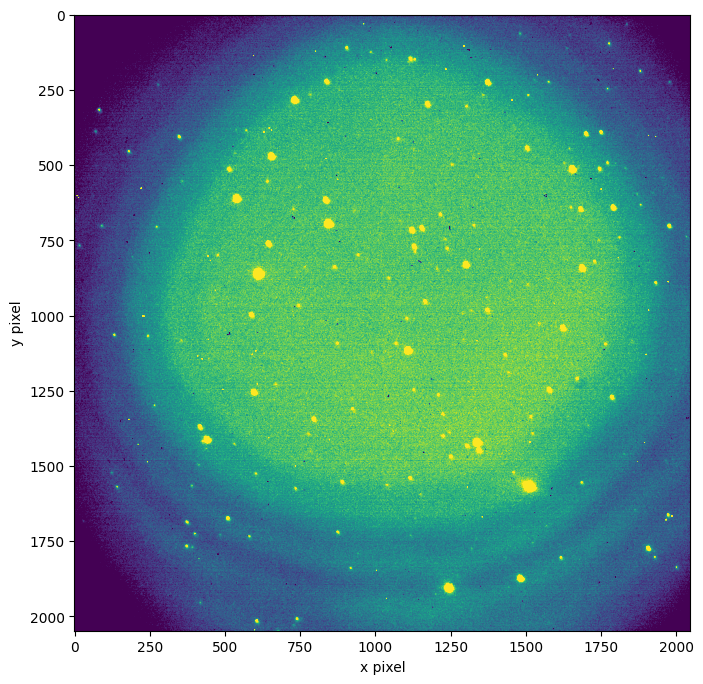

In [17]:
d_nodark = d_debiased-mdark
plot_2d(d_nodark, vrange=100)

<Axes: xlabel='x pixel', ylabel='y pixel'>

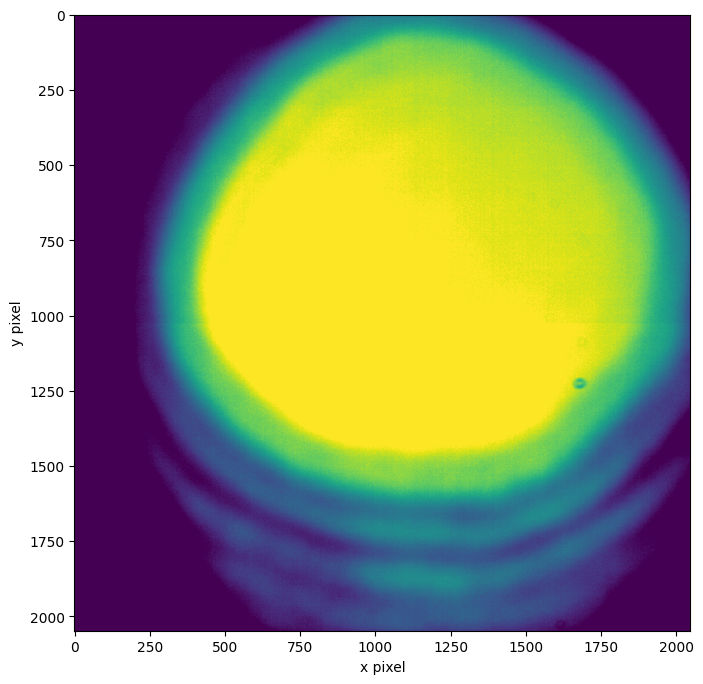

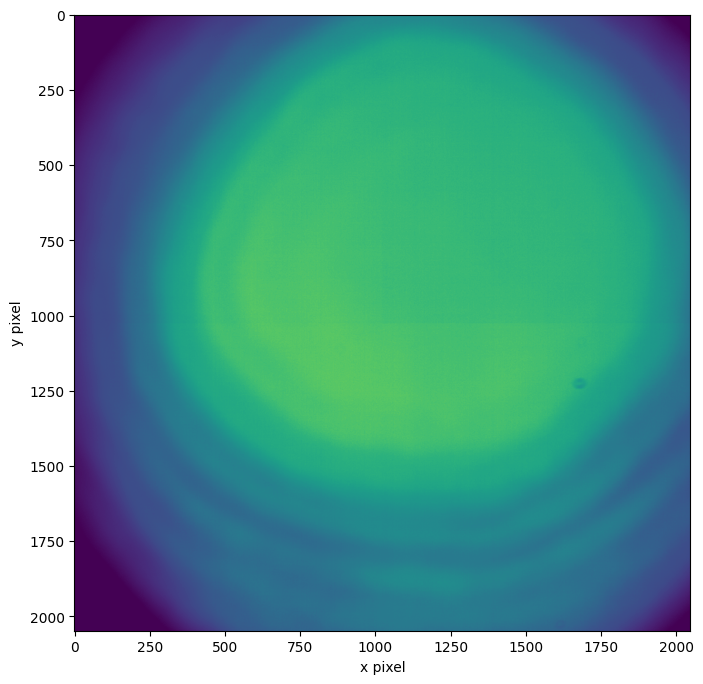

In [18]:
#FLAT FIELDING, correzione su larga scala o su scala del pixel. Per fare flat field lungo tempo di esposizione.

flat_array = np.asarray([fits.open('/home/starcat/Scaricati/Calib-Qpani/calib/flat-{:04d}_V.fit'.format(i))[0].data for i in range(1, 10)])

flat_red = np.asarray([f - master_bias - mdark for f in flat_array])
plot_2d(flat_array[0], vrange=10000)

#IL FLAT verrà utilizzato in forma normalizzata e dividendo invece di sottrarre! Fico

master_flat = np.median(flat_array, axis = 0)
mflat = master_flat/np.median(master_flat)
plot_2d(mflat, vrange = 1.2)


<Axes: xlabel='x pixel', ylabel='y pixel'>

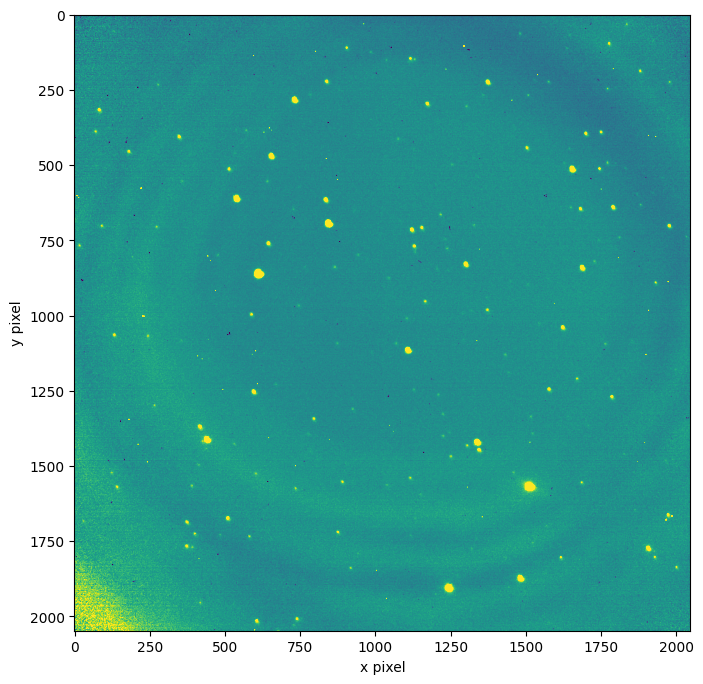

In [19]:
#come abbiamo detto ha un effetto moltiplicativo il flat e dunque si tratta come segue

d_red = d_nodark/mflat

plot_2d(d_red)

In [21]:
hdul[0].data = d_red

hdul.writeto('/home/starcat/Scaricati/Calib-Qpani/calib/reducedImg.fit', overwrite=True)